# DM_08_04
## Import packages
We'll create a hidden Markov model to examine the state-shifting in the dataset.

In [3]:
% matplotlib inline

import pylab
import numpy as np
import pandas as pd

from hmmlearn.hmm import GaussianHMM

## Import data
Read CSV file into "df."

In [4]:
df = pd.read_csv("speed.csv", sep = ",")
df.head(5)

,row,rt,corr,Pacc,prev
0,1,6.456770,cor,0.0,inc
1,2,5.602119,cor,0.0,cor
2,3,6.253829,inc,0.0,cor
3,4,5.451038,inc,0.0,inc
4,5,5.872118,inc,0.0,inc


Drop the row number and "corr" so we can focus on the influence of "prev" and "Pacc" on "rt." Also define "prev" as a factor.

In [5]:
x = df.drop(["row", "corr"], axis = 1)
x["prev"] = pd.factorize(x["prev"])[0]

## Create model
Make an HMM with 2 states. (The choice of 2 is based on theory.)

In [6]:
model = GaussianHMM(n_components=2, n_iter=10000, random_state=1).fit(x)
model.monitor_

ConvergenceMonitor(history=[-116.44940310313338, -116.4467051828148], iter=8,
          n_iter=10000, tol=0.01, verbose=False)

Predict the hidden state for each record and get count of predicted states.

In [7]:
states = model.predict(x)
pd.Series(states).value_counts()

0    243
1    196
dtype: int64

Get the mean reaction time (rt) for each of the two states.

In [8]:
model.means_[:, 0]

array([ 6.40098754,  5.56434105])

## Visualize results
Make a graph to show the change of states.

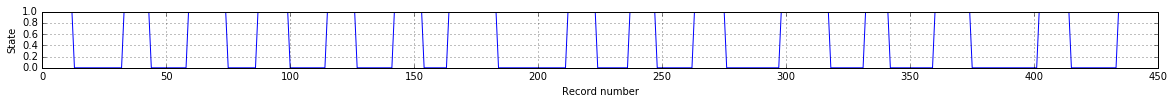

In [9]:
fig = pylab.figure(figsize=(20, 1))
ax = fig.add_subplot(111)
ax.grid(True)
ax.set_xlabel("Record number")
ax.set_ylabel("State")
ax.plot(states)